In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
import math

%matplotlib inline

from pylorentz import Momentum4

In [2]:
col_names = ["isPassed","m_catCoup_HybridFullRun2","m_weightCatCoup_HybridFullRun2","m_weight_MC",
             "y1.Pt","y1.Eta","y1.Phi","y1.E",
             "y2.Pt*1000.","y2.Eta","y2.Phi","y2.E",
             "jet0.pt","jet0.eta","jet0.phi","jet0.e",
             "jet1.pt","jet1.eta","jet1.phi","jet1.e",
             "jet2.pt","jet2.eta","jet2.phi","jet2.e",
             "jet3.pt","jet3.eta","jet3.phi","jet3.e",
             "jet4.pt","jet4.eta","jet4.phi","jet4.e",
             "jet5.pt","jet5.eta","jet5.phi","jet5.e",
             "jet6.pt","jet6.eta","jet6.phi","jet6.e",
             "jet7.pt","jet7.eta","jet7.phi","jet7.e",
             "jet8.pt","jet8.eta","jet8.phi","jet8.e",
             "jet9.pt","jet9.eta","jet9.phi","jet9.e",
             "jet10.pt","jet10.eta","jet10.phi","jet10.e"] 

### Loading data (10% of total)

In [3]:
signal = pd.read_csv("PowhegPy8EG_NNPDF30_VBFH125mc16a.csv",names=col_names,dtype="float32",nrows=104e3)#,nrows=104e3)
background = pd.read_csv("Sherpa2_yyjj_njetGeq2_mjj_gt350.csv",names=col_names,dtype="float32",nrows=302e3)#,nrows=256e3)

In [4]:
signal.shape,background.shape

((104000, 56), (302000, 56))

In [5]:
signal["signal"]= np.ones(signal.shape[0])
background["signal"] = np.zeros(background.shape[0])

In [6]:
total_event_count = signal.shape[0]+background.shape[0]

In [7]:
total_event_count

406000

## Combine signal and background

In [13]:
df = pd.concat([signal,background], sort=False)

In [14]:
df.reset_index(drop=True, inplace=True)

### Separate features and target columns

In [17]:
X = df.drop(["isPassed","m_catCoup_HybridFullRun2","m_weightCatCoup_HybridFullRun2","m_weight_MC",
             "signal"],axis=1)
y = df["signal"]
X.shape,y.shape

((406000, 52), (406000,))

### ATLAS feature engineering

In [19]:
def Plot_normalised_feature(var,bins,label):
    labels = ["non. res.","VBF"]
    for signal in [0,1]:
        mask = df.signal == signal
        non_zero = np.count_nonzero(~np.isnan(var[mask]))
        weights = np.ones_like(var[mask])/float(non_zero)
        plt.hist(var[mask],alpha=0.5, label=labels[signal],bins = bins,weights=weights)
    plt.xlabel(label)
    plt.ylabel("Fraction")
    plt.legend()
    plt.show()

In [20]:
jets_e = ["jet0.e","jet1.e","jet2.e","jet3.e","jet4.e","jet5.e","jet6.e","jet7.e","jet8.e","jet9.e","jet10.e"]

In [21]:
jets_pt = ["jet0.pt","jet1.pt","jet2.pt","jet3.pt","jet4.pt","jet5.pt","jet6.pt","jet7.pt","jet8.pt","jet9.pt",
             "jet10.pt"]

In [22]:
jets_eta = ["jet0.eta","jet1.eta","jet2.eta","jet3.eta","jet4.eta","jet5.eta","jet6.eta","jet7.eta","jet8.eta","jet9.eta",
             "jet10.eta"]

In [23]:
jets_phi = ["jet0.phi","jet1.phi","jet2.phi","jet3.phi","jet4.phi","jet5.phi","jet6.phi","jet7.phi","jet8.phi","jet9.phi",
             "jet10.phi"]

In [24]:
particles_e = ["y1.E","y2.E","jet0.e","jet1.e","jet2.e","jet3.e","jet4.e","jet5.e","jet6.e","jet7.e","jet8.e",
               "jet9.e","jet10.e"]

In [25]:
particles_pt = ["y1.Pt","y2.Pt*1000.","jet0.pt","jet1.pt","jet2.pt","jet3.pt","jet4.pt","jet5.pt","jet6.pt","jet7.pt",
                "jet8.pt","jet9.pt","jet10.pt"]

In [26]:
particles_eta = ["y1.Eta","y2.Eta","jet0.eta","jet1.eta","jet2.eta","jet3.eta","jet4.eta","jet5.eta","jet6.eta",
                 "jet7.eta","jet8.eta","jet9.eta","jet10.eta"]

In [27]:
particles_phi = ["y1.Phi","y2.Phi","jet0.phi","jet1.phi","jet2.phi","jet3.phi","jet4.phi","jet5.phi","jet6.phi","jet7.phi","jet8.phi","jet9.phi",
             "jet10.phi"]

In [28]:
#terminal_output = open(1, 'w')

#### njets

In [29]:
njets = np.sum(np.where(X[jets_e]>0,1,0),axis=1)

In [30]:
np.savetxt("njets(10%total,VBF,non_res).txt",njets)

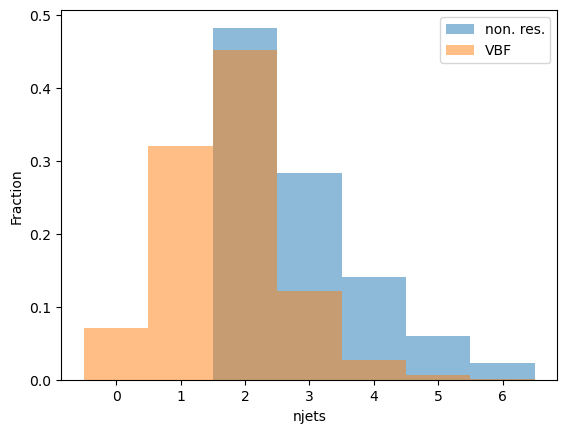

In [31]:
Plot_normalised_feature(njets,np.linspace(-0.5,6.5,8),"njets")

In [32]:
#print("njets[0]",file=terminal_output)

#### pT of highest pT jet

In [33]:
pt_highest_pt_jet = X["jet0.pt"]

In [34]:
np.savetxt("pt_highest_pt_jet(10%total,VBF,non_res).txt",pt_highest_pt_jet)

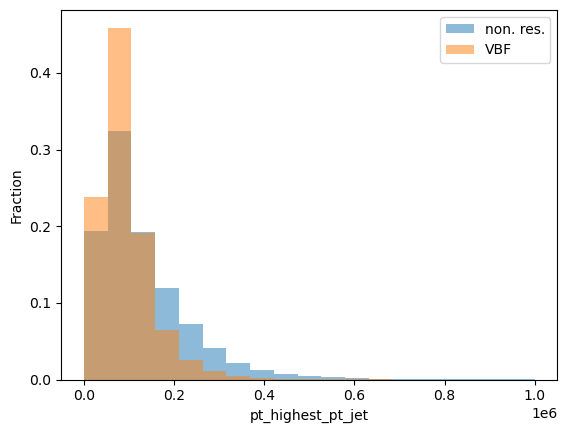

In [35]:
Plot_normalised_feature(pt_highest_pt_jet,np.linspace(0,1e6,20),"pt_highest_pt_jet")

In [36]:
#print("pt_highest_pt_jet[1]",file=terminal_output)

#### Scalar sum of pT of all jets

In [37]:
sum_pt_all_jets = np.nansum(X[jets_pt].values,axis=1)

In [38]:
np.savetxt("sum_pt_all_jets(10%total,VBF,non_res).txt",sum_pt_all_jets)

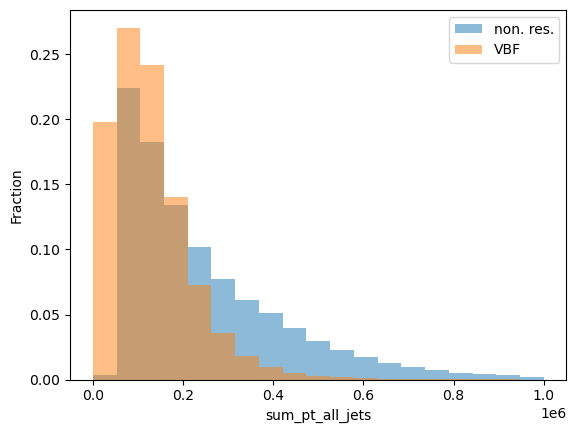

In [39]:
Plot_normalised_feature(sum_pt_all_jets,np.linspace(0,1e6,20),"sum_pt_all_jets")

In [40]:
#print("sum_pt_all_jets[2]",file=terminal_output)

#### Number of central jets

In [41]:
number_central_jets = np.sum(abs(X[jets_eta])<2.5,axis=1)

In [42]:
np.savetxt("number_central_jets(10%total,VBF,non_res).txt",number_central_jets)

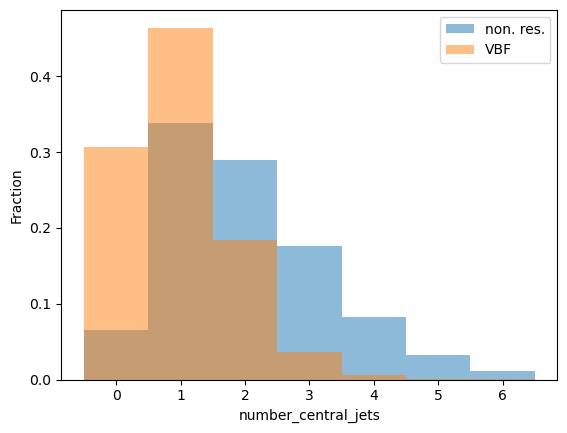

In [43]:
Plot_normalised_feature(number_central_jets,np.linspace(-0.5,6.5,8),"number_central_jets")

In [44]:
#print("number_central_jets[3]",file=terminal_output)

#### Invariant mass of the jet system

In [45]:
energies = X[jets_e].values

In [46]:
pts = X[jets_pt].values

In [47]:
etas = X[jets_eta].values

In [48]:
phis = X[jets_phi].values

In [49]:
total_events = X.shape[0]
invariant_mass_jet_system = np.array([])
#total_events = 100000
for i in range(0,total_events):
    jet_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate jet 4-vector
    #print("Number of jets: ", njets[i])
    if i%100000==0:
        print(i)
    for j in range(0,njets[i]):
        jet_4vec += Momentum4.e_eta_phi_pt(energies[i,j], etas[i,j], phis[i,j], pts[i,j])
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    invariant_mass_jet_system = np.append(invariant_mass_jet_system,jet_4vec.m)

0
100000
200000
300000
400000


In [50]:
invariant_mass_jet_system.real

array([1071162.21223574,  970789.76520321,  918564.97603065, ...,
       1640213.3606687 , 1031692.69000686,  778774.59791159])

In [51]:
np.savetxt("invariant_mass_jet_system_real(10%total,VBF,non_res).txt",invariant_mass_jet_system.real)

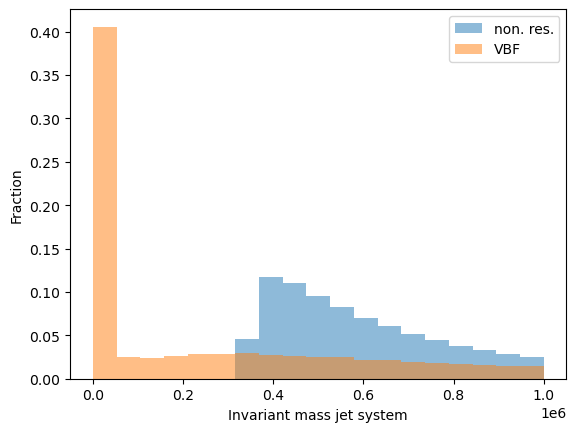

In [52]:
Plot_normalised_feature(invariant_mass_jet_system.real,np.linspace(0,1e6,20),"Invariant mass jet system")

In [53]:
#print("invariant_mass_jet_system_real[4]",file=terminal_output)

#### Scalar sum of transverse energy of all particles

In [54]:
particles_e = ["y1.E","y2.E","jet0.e","jet1.e","jet2.e","jet3.e","jet4.e","jet5.e","jet6.e","jet7.e","jet8.e",
               "jet9.e","jet10.e"]

In [55]:
particles_pt = ["y1.Pt","y2.Pt*1000.","jet0.pt","jet1.pt","jet2.pt","jet3.pt","jet4.pt","jet5.pt","jet6.pt","jet7.pt",
                "jet8.pt","jet9.pt","jet10.pt"]

In [56]:
particles_eta = ["y1.Eta","y2.Eta","jet0.eta","jet1.eta","jet2.eta","jet3.eta","jet4.eta","jet5.eta","jet6.eta",
                 "jet7.eta","jet8.eta","jet9.eta","jet10.eta"]

In [57]:
particles_phi = ["y1.Phi","y2.Phi","jet0.phi","jet1.phi","jet2.phi","jet3.phi","jet4.phi","jet5.phi","jet6.phi","jet7.phi","jet8.phi","jet9.phi",
             "jet10.phi"]

In [58]:
energies = X[particles_e].values

In [59]:
pts = X[particles_pt].values

In [60]:
etas = X[particles_eta].values

In [61]:
phis = X[particles_phi].values

In [62]:
total_events = X.shape[0]
sum_trans_energy_particles = np.array([])
#total_events = 100000
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    particles_trans_energy = 0 # Initiate energy sum
    if i%100000==0:
        print(i)
    for j in range(0,njets[i]+2):
        particles_trans_energy += Momentum4.e_eta_phi_pt(energies[i,j], etas[i,j], phis[i,j], pts[i,j]).trans
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    sum_trans_energy_particles = np.append(sum_trans_energy_particles,particles_trans_energy)

0
100000
200000
300000
400000


In [63]:
sum_trans_energy_particles

array([ 321465.19402858,  423821.50969948,  271610.89932799, ...,
       1247427.39864192,  195557.60338281,  613155.71646671])

In [64]:
np.savetxt("sum_trans_energy_particles(10%total,VBF,non_res).txt",sum_trans_energy_particles)

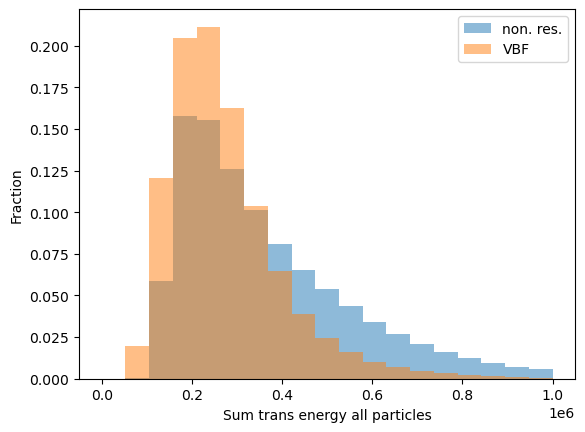

In [65]:
Plot_normalised_feature(sum_trans_energy_particles,np.linspace(0,1e6,20),"Sum trans energy all particles")

In [66]:
#print("sum_trans_energy_particles[5]",file=terminal_output)

#### Delta phi between yy and jets

In [67]:
total_events = X.shape[0]
delta_phi_yy_jets = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    photon_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate yy 4-vector
    jet_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate jet 4-vector
    if i%100000==0:
        print(i)
    for j in range(0,2):
        photon_4vec += Momentum4.e_eta_phi_pt(energies[i,j], etas[i,j], phis[i,j], pts[i,j])
    for k in range(2,njets[i]+2):
        jet_4vec += Momentum4.e_eta_phi_pt(energies[i,k], etas[i,k], phis[i,k], pts[i,k])
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    delta_phi = abs(photon_4vec.phi-jet_4vec.phi)
    #print(photon_4vec.phi,jet_4vec.phi)
    #print(delta_phi)
    delta_phi_yy_jets = np.append(delta_phi_yy_jets,delta_phi)

0
100000
200000
300000
400000


In [68]:
delta_phi_yy_jets

array([2.93551108, 3.12655866, 2.94792253, ..., 1.90000244, 4.56566599,
       2.49898511])

In [69]:
np.savetxt("delta_phi_yy_jets(10%total,VBF,non_res).txt",delta_phi_yy_jets)

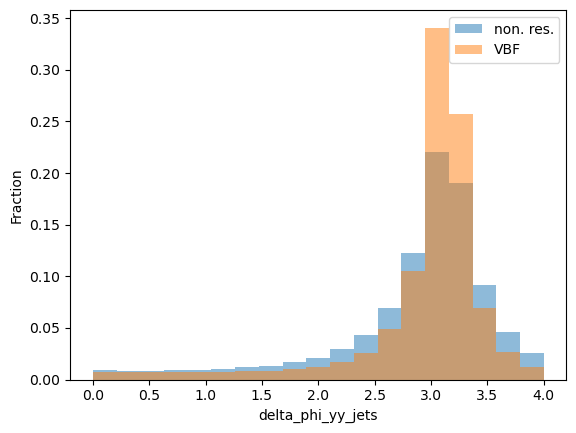

In [70]:
Plot_normalised_feature(delta_phi_yy_jets,np.linspace(0,4,20),"delta_phi_yy_jets")

In [71]:
#print("delta_phi_yy_jets[6]",file=terminal_output)

#### Delta rapidity between yy and jets

In [72]:
total_events = X.shape[0]
delta_rapidity_yy_jets = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    photon_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate yy 4-vector
    jet_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate jet 4-vector
    if i%100000==0:
        print(i)
    for j in range(0,2):
        photon_4vec += Momentum4.e_eta_phi_pt(energies[i,j], etas[i,j], phis[i,j], pts[i,j])
    for k in range(2,njets[i]+2):
        jet_4vec += Momentum4.e_eta_phi_pt(energies[i,k], etas[i,k], phis[i,k], pts[i,k])
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    rapidity_photons = photon_4vec.eta-(np.cos(photon_4vec.theta)*(photon_4vec.m/photon_4vec.p_t)**2)
    rapidity_jets = jet_4vec.eta-(np.cos(jet_4vec.theta)*(jet_4vec.m/jet_4vec.p_t)**2)
    delta_rapidity = abs(rapidity_photons-rapidity_jets)
    #print(photon_4vec.phi,jet_4vec.phi)
    #print(delta_phi)
    delta_rapidity_yy_jets = np.append(delta_rapidity_yy_jets,delta_rapidity)

0


/tmp/ipykernel_537988/4018634410.py:18: RuntimeWarning: invalid value encountered in scalar divide
  rapidity_jets = jet_4vec.eta-(np.cos(jet_4vec.theta)*(jet_4vec.m/jet_4vec.p_t)**2)


100000
200000
300000
400000


In [73]:
delta_rapidity_yy_jets

array([ 330.06675344,   17.88647488,  173.38006244, ...,  125.07597764,
       1193.88742191, 1831.75853123])

In [74]:
np.savetxt("delta_rapidity_yy_jets(10%total,VBF,non_res).txt",delta_rapidity_yy_jets)

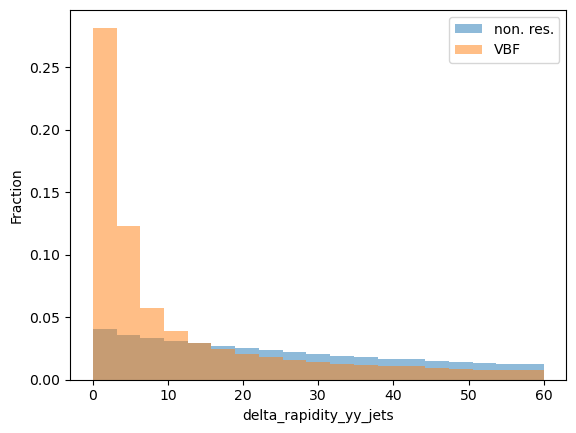

In [75]:
Plot_normalised_feature(delta_rapidity_yy_jets,np.linspace(0,60,20),"delta_rapidity_yy_jets")

In [76]:
#print("delta_rapidity_yy_jets[7]",file=terminal_output)

#### pT j1 and j2

In [77]:
energies = X[jets_e].values

In [78]:
pts = X[jets_pt].values

In [79]:
etas = X[jets_eta].values

In [80]:
phis = X[jets_phi].values

In [81]:
total_events = X.shape[0]
pt_j1_j2 = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    jet_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate jet 4-vector
    if i%100000==0:
        print(i)
    for j in range(0,2):
        jet_4vec += Momentum4.e_eta_phi_pt(energies[i,j], etas[i,j], phis[i,j], pts[i,j])
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    pt_j1_j2 = np.append(pt_j1_j2,jet_4vec.p_t)

0
100000
200000
300000
400000


In [82]:
pt_j1_j2

array([ 28820.59060969, 182404.01350489,  32352.68642143, ...,
       177591.50062225,  29153.29272275,  32084.04453522])

In [83]:
np.savetxt("pt_j1_j2(10%total,VBF,non_res).txt",pt_j1_j2)

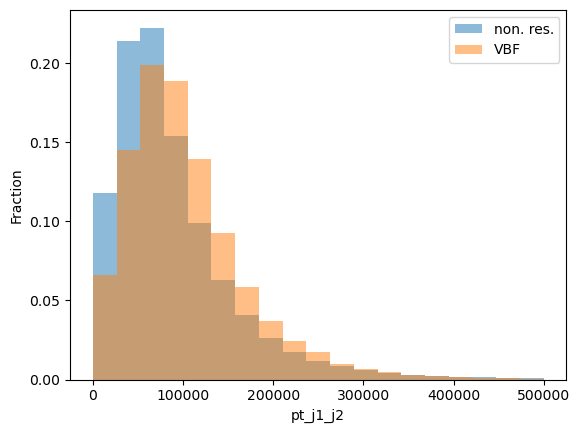

In [84]:
Plot_normalised_feature(pt_j1_j2,np.linspace(0,0.5e6,20),"pt_j1_j2")

In [85]:
#print("pt_j1_j2[8]",file=terminal_output)

#### mass j1 j2

In [86]:
total_events = X.shape[0]
m_j1_j2 = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    jet_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate jet 4-vector
    if i%100000==0:
        print(i)
    for j in range(0,2):
        jet_4vec += Momentum4.e_eta_phi_pt(energies[i,j], etas[i,j], phis[i,j], pts[i,j])
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    m_j1_j2 = np.append(m_j1_j2,jet_4vec.m)

0
100000
200000
300000
400000


In [87]:
m_j1_j2

array([ 744594.10799383+0.j,  826044.29934838+0.j,  564857.2080069 +0.j,
       ..., 1506675.44446145+0.j, 1031692.69000686+0.j,
        422720.78920087+0.j])

In [88]:
m_j1_j2.real

array([ 744594.10799383,  826044.29934838,  564857.2080069 , ...,
       1506675.44446145, 1031692.69000686,  422720.78920087])

In [89]:
np.savetxt("m_j1_j2_real(10%total,VBF,non_res).txt",m_j1_j2.real)

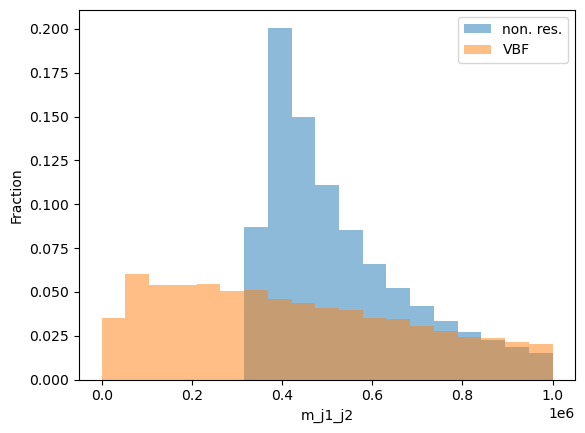

In [90]:
Plot_normalised_feature(m_j1_j2.real,np.linspace(0,1e6,20),"m_j1_j2")

In [91]:
#print("m_j1_j2_real[9]",file=terminal_output)

#### Delta rapidity j1 j2

In [92]:
total_events = X.shape[0]
delta_y_j1_j2 = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    #jet_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate jet 4-vector
    if i%100000==0:
        print(i)
    jet1_4vec = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0])
    jet2_4vec = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1])
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    rapidity_j1 = jet1_4vec.eta-(np.cos(jet1_4vec.theta)*(jet1_4vec.m/jet1_4vec.p_t)**2)
    rapidity_j2 = jet2_4vec.eta-(np.cos(jet2_4vec.theta)*(jet2_4vec.m/jet2_4vec.p_t)**2)
    delta_rapidity = abs(rapidity_j1-rapidity_j2)
    delta_y_j1_j2 = np.append(delta_y_j1_j2,delta_rapidity)

0


/tmp/ipykernel_537988/905473587.py:15: RuntimeWarning: invalid value encountered in scalar divide
  rapidity_j2 = jet2_4vec.eta-(np.cos(jet2_4vec.theta)*(jet2_4vec.m/jet2_4vec.p_t)**2)
/tmp/ipykernel_537988/905473587.py:14: RuntimeWarning: invalid value encountered in scalar divide
  rapidity_j1 = jet1_4vec.eta-(np.cos(jet1_4vec.theta)*(jet1_4vec.m/jet1_4vec.p_t)**2)


100000
200000
300000
400000


In [93]:
delta_y_j1_j2

array([4.52701092, 4.60944552, 5.06203057, ..., 1.82944182, 6.64055926,
       1.22321746])

In [94]:
np.savetxt("delta_y_j1_j2(10%total,VBF,non_res).txt",delta_y_j1_j2)

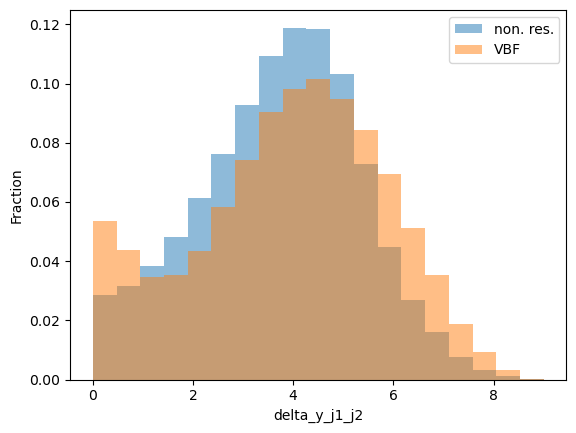

In [95]:
Plot_normalised_feature(delta_y_j1_j2,np.linspace(0,9,20),"delta_y_j1_j2")

In [96]:
#print("delta_y_j1_j2[10]",file=terminal_output)

#### Delta phi j1 j2

In [97]:
total_events = X.shape[0]
delta_phi_j1_j2 = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    #jet_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate jet 4-vector
    if i%100000==0:
        print(i)
    jet1_phi = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0]).phi
    jet2_phi = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1]).phi
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    delta_phi = abs(jet1_phi-jet2_phi)
    delta_phi_j1_j2 = np.append(delta_phi_j1_j2,delta_phi)

0
100000
200000
300000
400000


In [98]:
delta_phi_j1_j2

array([3.43223699, 0.25651002, 2.44279992, ..., 3.14475698, 3.95067997,
       3.07080099])

In [99]:
np.savetxt("delta_phi_j1_j2(10%total,VBF,non_res).txt",delta_phi_j1_j2)

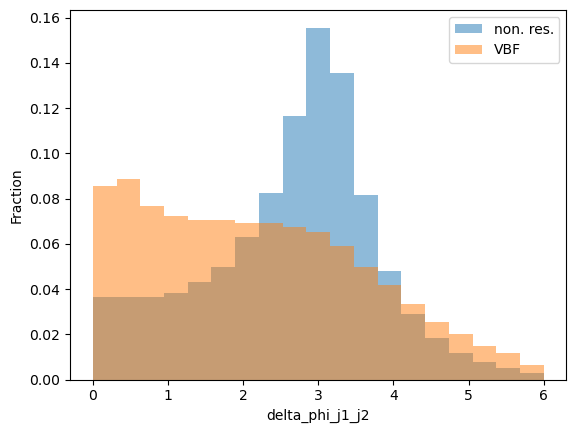

In [100]:
Plot_normalised_feature(delta_phi_j1_j2,np.linspace(0,6,20),"delta_phi_j1_j2")

In [101]:
#print("delta_phi_j1_j2[11]",file=terminal_output)

#### Delta eta j1 j2

In [102]:
total_events = X.shape[0]
delta_eta_j1_j2 = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    #jet_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate jet 4-vector
    if i%100000==0:
        print(i)
    jet1_eta = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0]).eta
    jet2_eta = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1]).eta
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    delta_eta = abs(jet1_eta-jet2_eta)
    delta_eta_j1_j2 = np.append(delta_eta_j1_j2,delta_eta)

0
100000
200000
300000
400000


In [103]:
delta_eta_j1_j2

array([4.56928024, 4.62570465, 5.08450884, ..., 1.8379794 , 6.65254945,
       1.2233762 ])

In [104]:
np.savetxt("delta_eta_j1_j2(10%total,VBF,non_res).txt",delta_eta_j1_j2)

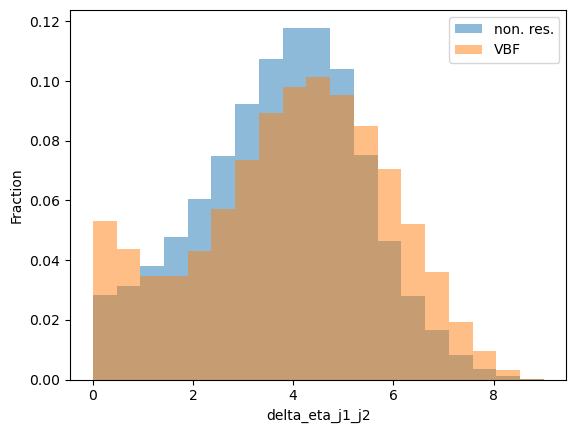

In [105]:
Plot_normalised_feature(delta_eta_j1_j2,np.linspace(0,9,20),"delta_eta_j1_j2")

In [106]:
#print("delta_eta_j1_j2[12]",file=terminal_output)

#### pT yyj1

In [107]:
energies = X[particles_e].values

In [108]:
pts = X[particles_pt].values

In [109]:
etas = X[particles_eta].values

In [110]:
phis = X[particles_phi].values

In [111]:
total_events = X.shape[0]
pt_yy_j1 = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    if i%100000==0:
        print(i)
    photon1 = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0])
    photon2 = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1])
    jet1 =  Momentum4.e_eta_phi_pt(energies[i,2], etas[i,2], phis[i,2], pts[i,2])
    system = photon1+photon2+jet1
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    pt_yy_j1 = np.append(pt_yy_j1,system.p_t)

0
100000
200000
300000
400000


In [112]:
pt_yy_j1

array([ 97847.83672113,  74676.54355812,  90471.74046012, ...,
       611788.60352554,  46952.29489742, 136052.24457921])

In [113]:
np.savetxt("pt_yy_j1(10%total,VBF,non_res).txt",pt_yy_j1)

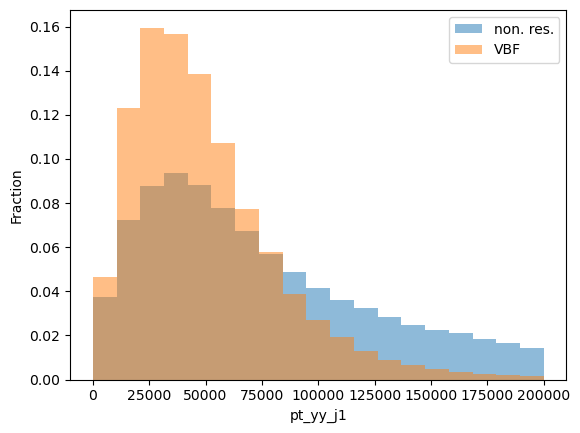

In [114]:
Plot_normalised_feature(pt_yy_j1,np.linspace(0,0.2e6,20),"pt_yy_j1")

In [115]:
#print("pt_yy_j1[13]",file=terminal_output)

#### mass yyj1


In [116]:
total_events = X.shape[0]
m_yy_j1 = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    if i%100000==0:
        print(i)
    photon1 = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0])
    photon2 = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1])
    jet1 =  Momentum4.e_eta_phi_pt(energies[i,2], etas[i,2], phis[i,2], pts[i,2])
    system = photon1+photon2+jet1
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    m_yy_j1 = np.append(m_yy_j1,system.m)

0
100000
200000
300000
400000


In [117]:
m_yy_j1.real

array([440391.34516817, 397303.82700211, 295701.41520775, ...,
       545206.6263131 , 435109.03095124, 564937.7738262 ])

In [118]:
np.savetxt("m_yy_j1_real(10%total,VBF,non_res).txt",m_yy_j1.real)

/opt/anaconda-2022.10/envs/daml/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6739: ComplexWarning: Casting complex values to real discards the imaginary part
  tops = np.array(tops, float)  # causes problems later if it's an int


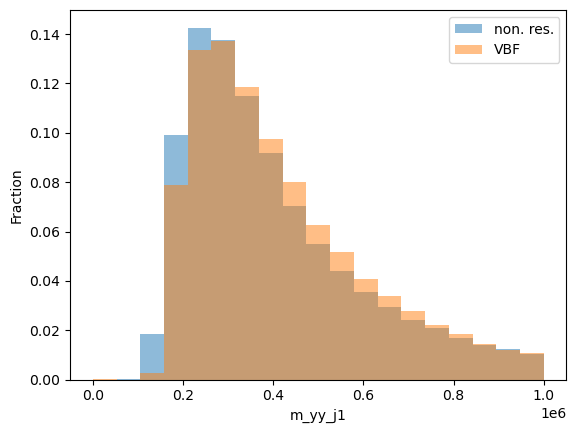

In [119]:
Plot_normalised_feature(m_yy_j1,np.linspace(0,1e6,20),"m_yy_j1")

In [120]:
#print("m_yy_j1_real[14]",file=terminal_output)

#### pT yy jj

In [121]:
total_events = X.shape[0]
pt_yy_jj = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    if i%100000==0:
        print(i)
    photon1 = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0])
    photon2 = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1])
    jet1 =  Momentum4.e_eta_phi_pt(energies[i,2], etas[i,2], phis[i,2], pts[i,2])
    jet2 =  Momentum4.e_eta_phi_pt(energies[i,3], etas[i,3], phis[i,3], pts[i,3])
    system = photon1+photon2+jet1+jet2
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    pt_yy_jj = np.append(pt_yy_jj,system.p_t)

0
100000
200000
300000
400000


In [122]:
pt_yy_jj

array([ 35055.31974365,  25130.14826707,  61163.35452309, ...,
       180860.95731023,  29632.78641022,  27031.02522609])

In [123]:
np.savetxt("pt_yy_jj(10%total,VBF,non_res).txt",pt_yy_jj)

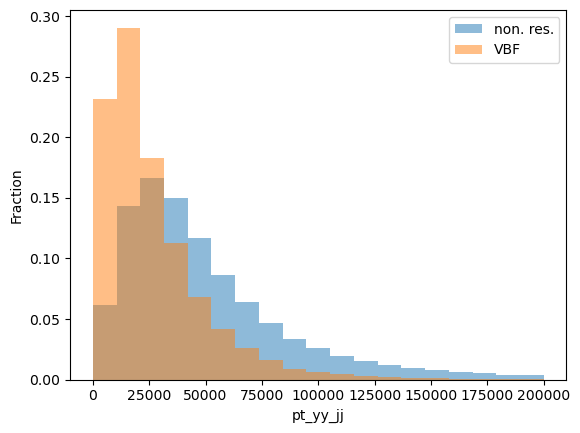

In [124]:
Plot_normalised_feature(pt_yy_jj,np.linspace(0,0.2e6,20),"pt_yy_jj")

In [125]:
#print("pt_yy_jj[15]",file=terminal_output)

#### Mass yy jj

In [126]:
total_events = X.shape[0]
m_yy_jj = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    if i%100000==0:
        print(i)
    photon1 = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0])
    photon2 = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1])
    jet1 =  Momentum4.e_eta_phi_pt(energies[i,2], etas[i,2], phis[i,2], pts[i,2])
    jet2 =  Momentum4.e_eta_phi_pt(energies[i,3], etas[i,3], phis[i,3], pts[i,3])
    system = photon1+photon2+jet1+jet2
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    m_yy_jj = np.append(m_yy_jj,system.m)

0
100000
200000
300000
400000


In [127]:
m_yy_jj.real

array([ 898605.95037854, 1192722.22010151,  722886.58759043, ...,
       1684488.18952927, 1159431.34315475,  746003.86403423])

In [128]:
np.savetxt("m_yy_jj_real(10%total,VBF,non_res).txt",m_yy_jj.real)

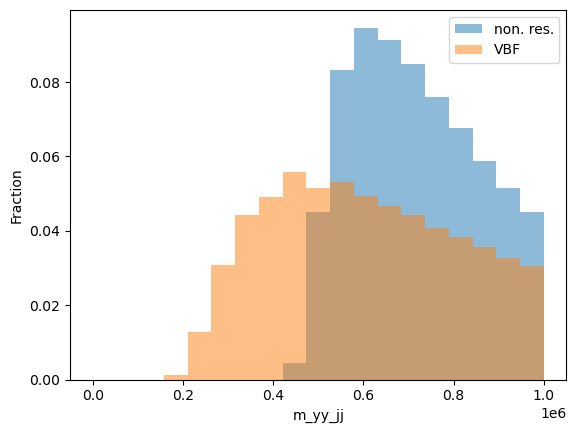

In [129]:
Plot_normalised_feature(m_yy_jj.real,np.linspace(0,1e6,20),"m_yy_jj")

In [130]:
#print("m_yy_jj_real[16]",file=terminal_output)

#### eta photon1

In [131]:
eta_photon1 = X["y1.Eta"]

In [132]:
np.savetxt("eta_photon1(10%total,VBF,non_res).txt",eta_photon1)

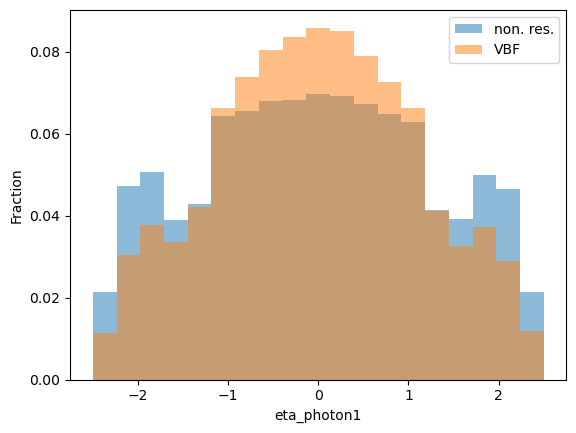

In [133]:
Plot_normalised_feature(eta_photon1,np.linspace(-2.5,2.5,20),"eta_photon1")

In [134]:
#print("eta_photon1[17]",file=terminal_output)

#### eta photon2

In [135]:
eta_photon2 = X["y2.Eta"]

In [136]:
np.savetxt("eta_photon2(10%total,VBF,non_res).txt",eta_photon2)

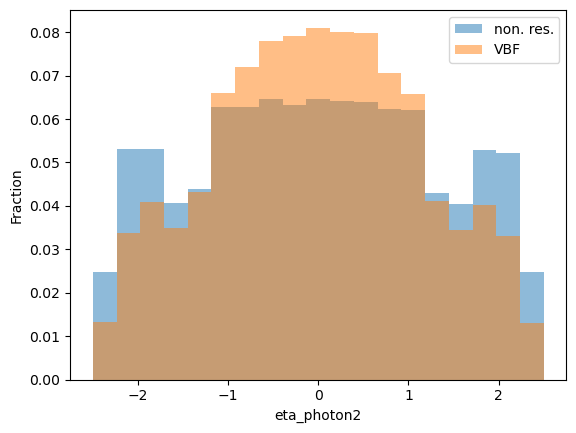

In [137]:
Plot_normalised_feature(eta_photon2,np.linspace(-2.5,2.5,20),"eta_photon2")

In [138]:
#print("eta_photon2[18]",file=terminal_output)

#### pT yy

In [139]:
total_events = X.shape[0]
pt_yy = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    if i%100000==0:
        print(i)
    photon1 = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0])
    photon2 = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1])
    system = photon1+photon2
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    pt_yy = np.append(pt_yy,system.p_t)

0
100000
200000
300000
400000


In [140]:
pt_yy

array([ 44990.14101107, 206883.97374592,  89070.76251289, ...,
        49598.4683753 ,  11070.45233257,  55574.48238858])

In [141]:
np.savetxt("pt_yy(10%total,VBF,non_res).txt",pt_yy)

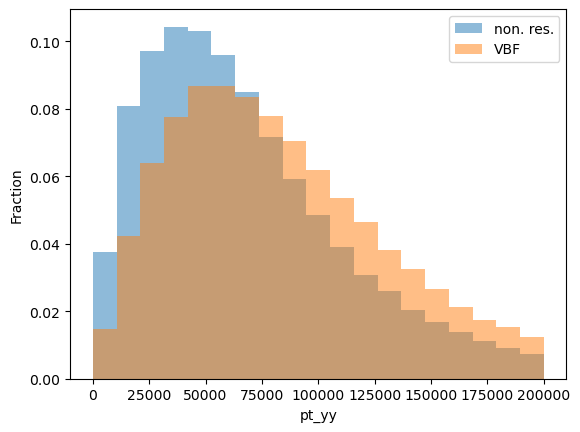

In [142]:
Plot_normalised_feature(pt_yy,np.linspace(0,0.2e6,20),"pt_yy")

In [143]:
#print("pt_yy[19]",file=terminal_output)

#### Rapidity yy

In [144]:
total_events = X.shape[0]
rapidity_yy = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    if i%100000==0:
        print(i)
    photon1 = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0])
    photon2 = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1])
    system = photon1+photon2
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    rapidity_system = system.eta-(np.cos(system.theta)*(system.m/system.p_t)**2)
    rapidity_yy = np.append(rapidity_yy,rapidity_system)

0
100000
200000
300000
400000


In [145]:
rapidity_yy.real

array([ -5.73736742,  -0.22577775,   0.34131966, ...,   9.07874977,
       -51.860697  ,   2.92164419])

In [146]:
np.savetxt("rapidity_yy_real(10%total,VBF,non_res).txt",rapidity_yy.real)

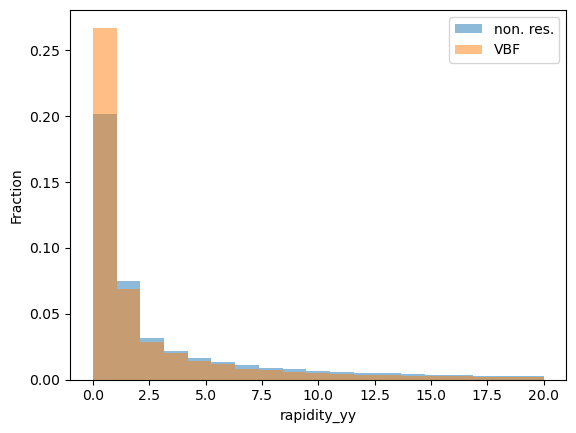

In [147]:
Plot_normalised_feature(rapidity_yy.real,np.linspace(0,20,20),"rapidity_yy")

In [148]:
#print("rapidity_yy_real[20]",file=terminal_output)

#### eta most forward jet

In [149]:
etas = X[jets_eta].values

In [150]:
forward_jet = np.argmax(np.nan_to_num(abs(etas), copy=True, nan=0.0),axis=1)

In [151]:
forward_jet_etas = etas[np.arange(0,total_events),forward_jet]

In [152]:
np.savetxt("forward_jet_etas(10%total,VBF,non_res).txt",forward_jet_etas)

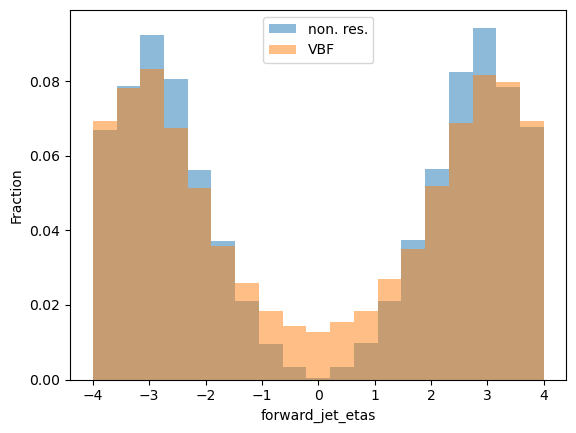

In [153]:
Plot_normalised_feature(forward_jet_etas,np.linspace(-4,4,20),"forward_jet_etas")

In [154]:
#print("forward_jet_etas[21]",file=terminal_output)

#### mass yy jF

In [155]:
energies = X[particles_e].values

In [156]:
pts = X[particles_pt].values

In [157]:
etas = X[particles_eta].values

In [158]:
phis = X[particles_phi].values

In [159]:
total_events = X.shape[0]
m_yy_jF = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    if i%100000==0:
        print(i)
    photon1 = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0])
    photon2 = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1])
    jet_F = Momentum4.e_eta_phi_pt(energies[i,forward_jet[i]+2], etas[i,forward_jet[i]+2], 
                                   phis[i,forward_jet[i]+2], pts[i,forward_jet[i]+2])
    system = photon1+photon2+jet_F
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    m_yy_jF = np.append(m_yy_jF,system.m)

0
100000
200000
300000
400000


In [160]:
m_yy_jF.real

array([283693.48499073, 773648.2830065 , 458532.65606773, ...,
       269661.49647696, 435109.03095124, 564937.7738262 ])

In [161]:
np.savetxt("m_yy_jF_real(10%total,VBF,non_res).txt",m_yy_jF.real)

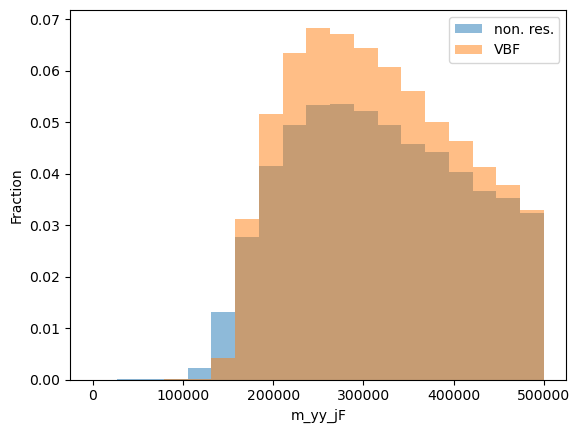

In [162]:
Plot_normalised_feature(m_yy_jF.real,np.linspace(0,500e3,20),"m_yy_jF")

In [163]:
#print("m_yy_jF_real[22]",file=terminal_output)

#### p^{H}_{T}

In [164]:
energies = X[particles_e].values

In [165]:
pts = X[particles_pt].values

In [166]:
etas = X[particles_eta].values

In [167]:
phis = X[particles_phi].values

In [168]:
total_events = X.shape[0]
p_H_T = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    if i%100000==0:
        print(i)
    photon1 = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0])
    photon2 = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1])
    photon_system = photon1+photon2
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    p_H_T = np.append(p_H_T,photon_system.p_t)

0
100000
200000
300000
400000


In [169]:
np.savetxt("p_H_T(10%total,VBF,non_res).txt",p_H_T)

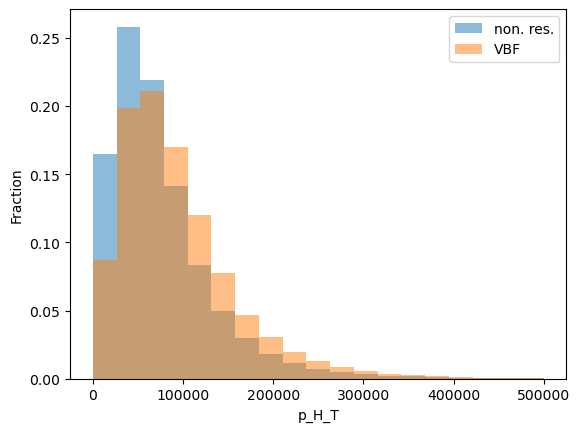

In [170]:
Plot_normalised_feature(p_H_T,np.linspace(0,500e3,20),"p_H_T")

In [171]:
#print("p_H_T[23]",file=terminal_output)

#### m_yy

In [21]:
energies = X[particles_e].values

In [22]:
pts = X[particles_pt].values

In [23]:
etas = X[particles_eta].values

In [24]:
phis = X[particles_phi].values

In [25]:
total_events = df.shape[0]
m_yy = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    if i%100000==0:
        print(i)
    photon1 = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0])
    photon2 = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1])
    #jet1 =  Momentum4.e_eta_phi_pt(energies[i,2], etas[i,2], phis[i,2], pts[i,2])
    system = photon1+photon2
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    m_yy = np.append(m_yy,system.m)

0
100000
200000
300000
400000


In [26]:
m_yy = np.real(m_yy)

In [27]:
np.savetxt("m_yy(10%total,VBF,non_res).txt",m_yy)

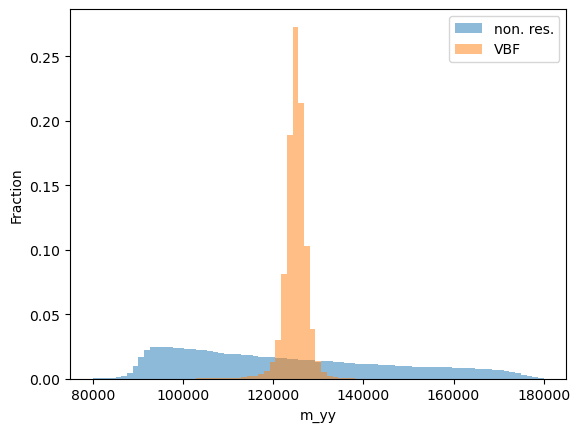

In [28]:
Plot_normalised_feature(m_yy,np.linspace(80e3,180e3,80),"m_yy")

#### pt_y1

In [30]:
pt_y1 = pts[:,0]

In [31]:
np.savetxt("pt_y1(10%total,VBF,non_res).txt",pt_y1)

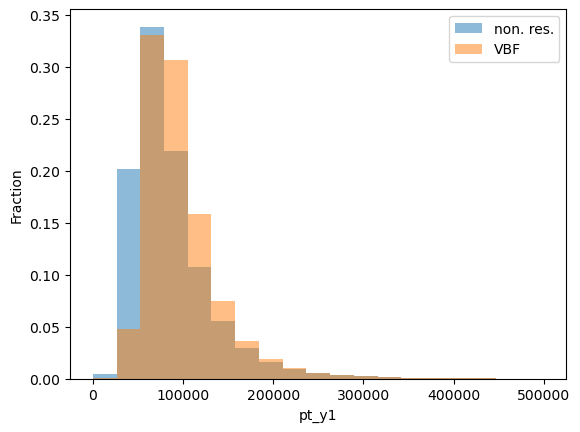

In [32]:
Plot_normalised_feature(pt_y1,np.linspace(0,500e3,20),"pt_y1")

#### pt_y2

In [33]:
pt_y2 = pts[:,1]

In [34]:
np.savetxt("pt_y2(10%total,VBF,non_res).txt",pt_y2)

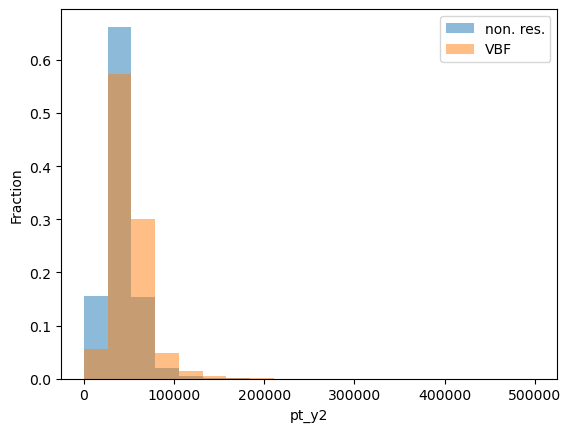

In [35]:
Plot_normalised_feature(pt_y2,np.linspace(0,500e3,20),"pt_y2")

### Extra binary training variables

In [21]:
energies = X[particles_e].values

In [22]:
pts = X[particles_pt].values

In [23]:
etas = X[particles_eta].values

In [24]:
phis = X[particles_phi].values

#### pt_yy_thrust

In [25]:
total_events = df.shape[0]
pt_yy_thrust = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    #jet_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate jet 4-vector
    if i%100000==0:
        print(i)
    y1 = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0])
    y2 = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1])
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    #thrust = abs(((y1.p_x*y2.p_y)-(y2.p_x*y1.p_y))/(2*(y1.p_t-y2.p_t)))    
    thrust = abs(y1.p_x*y2.p_y - y2.p_x*y1.p_y)/(y1-y2).p_t * 2.0 
    pt_yy_thrust = np.append(pt_yy_thrust,thrust)

0
100000
200000
300000
400000


In [26]:
pt_yy_thrust

array([34094.77452569, 18778.23557561,  1742.71982329, ...,
       47957.90130154,  7009.38809785, 54884.65572119])

In [27]:
np.savetxt("pt_yy_thrust(10%total,VBF,non_res).txt",pt_yy_thrust)

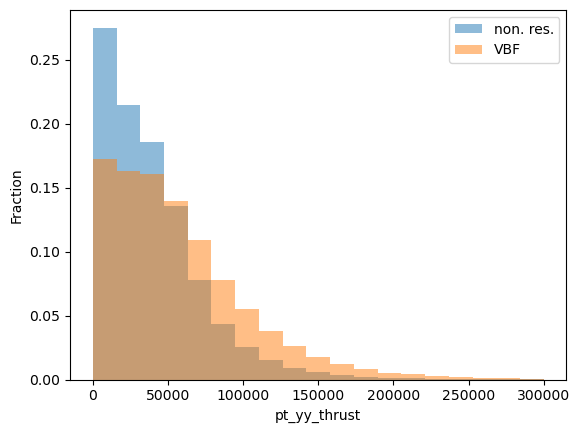

In [28]:
Plot_normalised_feature(pt_yy_thrust,np.linspace(0,3e5,20),"pt_yy_thrust")

#### delta_eta_yy

In [45]:
total_events = df.shape[0]
delta_eta_yy = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    #jet_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate jet 4-vector
    if i%100000==0:
        print(i)
    y1_eta = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0]).eta
    y2_eta = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1]).eta
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    delta_eta = abs(y1_eta-y2_eta)
    delta_eta_yy = np.append(delta_eta_yy,delta_eta)

0
100000
200000
300000
400000


In [46]:
delta_eta_yy

array([0.5602821 , 1.21468091, 0.99399999, ..., 1.30914963, 0.05225185,
       2.53893125])

In [47]:
np.savetxt("delta_eta_yy(10%total,VBF,non_res).txt",delta_eta_yy)

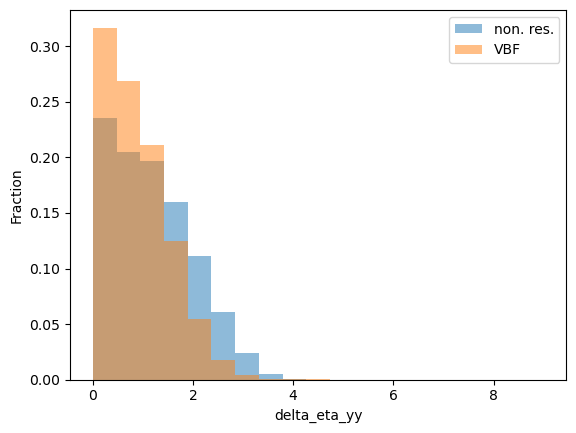

In [48]:
Plot_normalised_feature(delta_eta_yy,np.linspace(0,9,20),"delta_eta_yy")

In [106]:
#print("delta_eta_j1_j2[12]",file=terminal_output)

#### eta_zepp ((eta_yy-eta-jj)/2)

In [49]:
total_events = df.shape[0]
eta_zepp = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    #jet_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate jet 4-vector
    if i%100000==0:
        print(i)
    y1 = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0])
    y2 = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1])
    j1 = Momentum4.e_eta_phi_pt(energies[i,2], etas[i,2], phis[i,2], pts[i,2])
    j2 = Momentum4.e_eta_phi_pt(energies[i,3], etas[i,3], phis[i,3], pts[i,3])
    
    photon_system = y1+y2
    jet_system = j1+j2
    
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    delta_eta = (photon_system.eta-jet_system.eta)/2
    eta_zepp = np.append(eta_zepp,delta_eta)

0
100000
200000
300000
400000


In [51]:
eta_zepp

array([-0.54016035,  1.22614474,  1.23193448, ...,  0.33253149,
       -1.42417479, -2.44850482])

In [64]:
np.savetxt("eta_zepp(10%total,VBF,non_res).txt",eta_zepp)

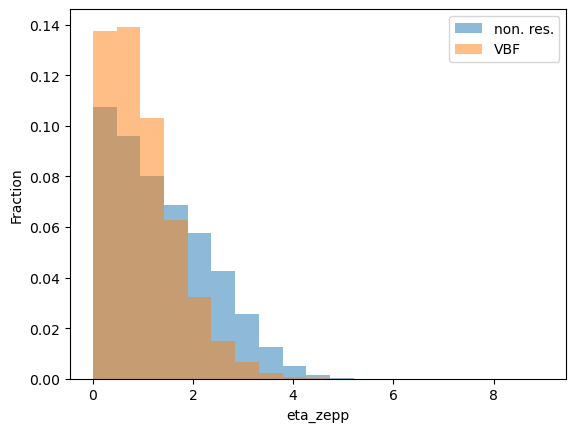

In [50]:
Plot_normalised_feature(eta_zepp,np.linspace(0,9,20),"eta_zepp")

#### phi*_yy

In [54]:
total_events = df.shape[0]
delta_phi_yy = np.array([])
#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    #jet_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate jet 4-vector
    if i%100000==0:
        print(i)
    y1_phi = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0]).phi
    y2_phi = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1]).phi
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
    delta_phi = abs(y1_phi-y2_phi)
    delta_phi_yy = np.append(delta_phi_yy,delta_phi)

0
100000
200000
300000
400000


In [58]:
delta_phi_yy

array([2.58269192, 0.07185298, 3.10251191, ..., 2.45592503, 3.25761996,
       1.345636  ])

In [59]:
phi_star_yy = np.tan((np.pi-abs(delta_phi_yy))/2)*np.sqrt(1-np.tanh(delta_eta_yy/2)**2)

In [60]:
phi_star_yy

array([ 2.76056010e-01,  2.33770182e+01,  1.73549583e-02, ...,
        2.92087049e-01, -5.80590086e-02,  6.53625859e-01])

In [63]:
np.savetxt("phi_star_yy(10%total,VBF,non_res).txt",phi_star_yy)

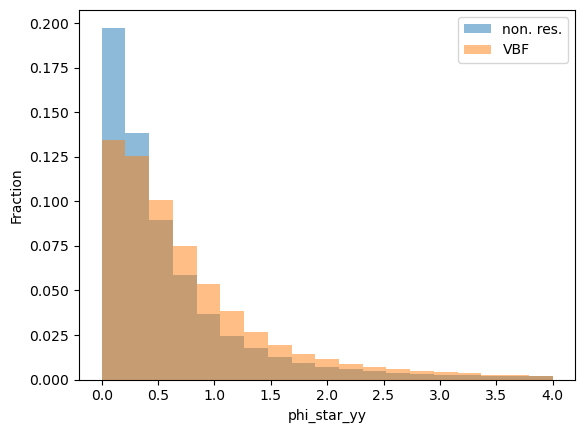

In [62]:
Plot_normalised_feature(phi_star_yy,np.linspace(0,4,20),"phi_star_yy")

#### cos(theta*_yy)

In [29]:
m_yy = pd.read_csv("m_yy(10%total,VBF,non_res).txt",header=None,dtype="float32").values.flatten()

In [30]:
pt_yy = pd.read_csv("pt_yy(10%total,VBF,non_res).txt",header=None,dtype="float32").values.flatten()

In [31]:
total_events = df.shape[0]
delta_phi_yy = np.array([])
E_y1 = np.array([])
E_y2 = np.array([])
pz_y1 = np.array([])
pz_y2 = np.array([])

#total_events = 5
for i in range(0,total_events):
    #print("Number of particles: ", njets[i]+2)
    #jet_4vec = Momentum4.e_eta_phi_pt(0, 0, 0, 0) # Initiate jet 4-vector
    if i%100000==0:
        print(i)
    y1 = Momentum4.e_eta_phi_pt(energies[i,0], etas[i,0], phis[i,0], pts[i,0])
    y2 = Momentum4.e_eta_phi_pt(energies[i,1], etas[i,1], phis[i,1], pts[i,1])
#     E_y1 = y1.e
#     E_y2 = y2.e
#     pz_y1 = y1.p_z
#     pz_y2 = y2.p_z
    
        #print(j)
        #print(jet_4vec)
        #print(jet_4vec.m)
#     delta_phi = abs(y1_phi-y2_phi)
#     delta_phi_y1y2 = np.append(delta_phi_yy,delta_phi)
    E_y1 = np.append(E_y1,y1.e)
    E_y2 = np.append(E_y2,y2.e)
    pz_y1 = np.append(pz_y1,y1.p_z)
    pz_y2 = np.append(pz_y2,y2.p_z)
    
    

0
100000
200000
300000
400000


In [32]:
np.savetxt("E_y1(10%total,VBF,non_res).txt",E_y1)

In [33]:
np.savetxt("E_y2(10%total,VBF,non_res).txt",E_y2)

In [34]:
np.savetxt("pz_y1(10%total,VBF,non_res).txt",pz_y1)

In [35]:
np.savetxt("pz_y2(10%total,VBF,non_res).txt",pz_y2)

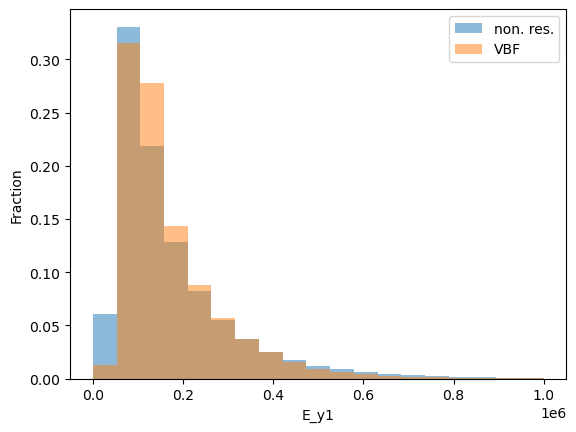

In [36]:
Plot_normalised_feature(E_y1,np.linspace(0,1e6,20),"E_y1")

In [52]:
# m_yy = (y1+y2).m
# pt_yy = (y1+y2).p_t
#cos_theta_star_yy = abs((((y1.e+y1.p_z)*(y2.e-y2.p_z))-((y1.e-y1.p_z)*(y2.e+y2.p_z)))/(m_yy*np.sqrt(m_yy**2+(pt_yy)**2)))
cos_theta_star_yy = abs((((E_y1+pz_y1)*(E_y2-pz_y2))-((E_y1-pz_y1)*(E_y2+pz_y2)))/(m_yy*np.sqrt(m_yy**2+(pt_yy)**2)))

print(cos_theta_star_yy)

[0.27690323 0.95358515 0.37718742 ... 0.59641178 0.02609908 0.93394567]


/tmp/ipykernel_745316/4230945812.py:4: RuntimeWarning: divide by zero encountered in divide
  cos_theta_star_yy = abs((((E_y1+pz_y1)*(E_y2-pz_y2))-((E_y1-pz_y1)*(E_y2+pz_y2)))/(m_yy*np.sqrt(m_yy**2+(pt_yy)**2)))


In [71]:
cos_theta_star_yy = abs((((E_y1+pz_y1)*(E_y2-pz_y2))-((E_y1-pz_y1)*(E_y2+pz_y2)))/(m_yy*np.sqrt(m_yy**2+(pt_yy)**2)))

/tmp/ipykernel_745316/3426344548.py:1: RuntimeWarning: divide by zero encountered in divide
  cos_theta_star_yy = abs((((E_y1+pz_y1)*(E_y2-pz_y2))-((E_y1-pz_y1)*(E_y2+pz_y2)))/(m_yy*np.sqrt(m_yy**2+(pt_yy)**2)))


In [73]:
zero_pos = np.where((m_yy*np.sqrt(m_yy**2+(pt_yy)**2))==0)[0]

In [74]:
cos_theta_star_yy[zero_pos] = 0

In [81]:
cos_theta_star_yy[zero_pos]

array([0., 0., 0., 0., 0., 0., 0.])

In [76]:
print(cos_theta_star_yy)

[0.27690323 0.95358515 0.37718742 ... 0.59641178 0.02609908 0.93394567]


In [79]:
np.savetxt("cos_theta_star_yy(10%total,VBF,non_res).txt",cos_theta_star_yy)

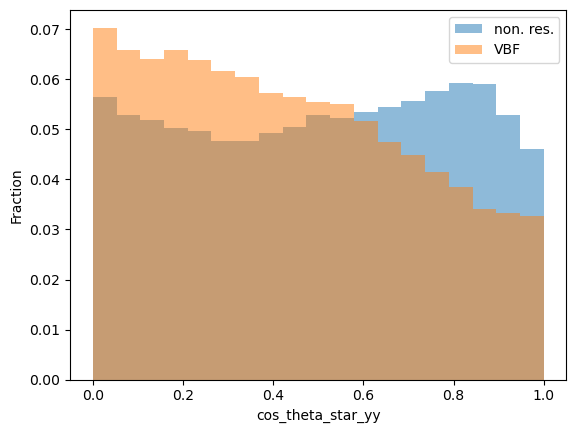

In [80]:
Plot_normalised_feature(cos_theta_star_yy,np.linspace(0,1,20),"cos_theta_star_yy")